# IGA-03. The Bankloans dataset

**Setup**: In this IGA you are asked to work with the *bankloans.xlsx* file (see the case-study discussion from the lecture). Each group works with its own indicator of **default on loans**. 

+ Group 1: debtinc
+ Group 2: educ
+ Group 3: othdebt
+ Group 4: address
+ Group 5: creddebt

Split the values of your indicator into **two** groups: one with **default = 0** and the other with **default = 1**.
Use the **5% level of significance** for statistical inference.


In [1]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats #statistical functions
import os 
from statsmodels.graphics.gofplots import qqplot

In [2]:
# [import the data here]
df_loans = pd.read_excel('bankloans.xlsx', 'bankloans', index_col=None, na_values=['NA'])

### Task 1. (1 point)

In the chunk below, give a brief economic explanation (no more than 100 words) on the expected influence of your indicator on the **default** variable.

**ANSWER:**
<br>We expect that the clients with bigger number of years spent living at one address are less likely to default on loan, because they can afford the stability of living at one house for years, so they probably have the means to pay the loan.

### Task 2. (1.5 points). 
+ Construct a histogram for your indicator on the **whole** sample
+ To study its shape, run the appropriate skewness and normality tests.
+ Make specific conclusions.

In [3]:
def myhist(x, b, label=None): #the function for building histograms
    x.plot.hist(grid=True, bins=b, rwidth=0.9, color='blue')
    plt.title('Histogram for ' + label)
    plt.xlabel('Years spent living at the same address')
    plt.ylabel('Number of observations')
    plt.show()

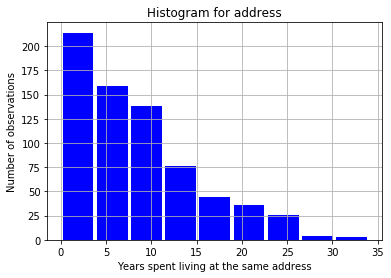

In [4]:
D_pd = pd.Series(df_loans['address']) 
myhist(D_pd, 9, 'address') #the nubmer of bins was chosen through trial and error, and we decided to stop at 9
# because bigger numbers make it seem multimodal

In [5]:
def mySKtest(x): #function for skewness test
    coefSK, pvSK = stats.skewtest(x)
    print("H0: Sk = 0")
    print("Skewness test statistic = ", round(coefSK,3))
    print("Skewness p-value = ", round(pvSK,3))

In [6]:
mySKtest(D_pd)

H0: Sk = 0
Skewness test statistic =  8.776
Skewness p-value =  0.0


In [7]:
def myNpVals(x):
    NpVals = pd.Series()

    _, NpVals['DAgostino'] = stats.normaltest(x)
    _, NpVals['Shapiro-Wilk'] = stats.shapiro(x)
    toprint = NpVals.round(3) #we rounded the numbers in the series, because without this the number was illegible
    print('p-values for {0} data points:'.format(len(x)))
    print(toprint)

In [8]:
myNpVals(D_pd)

p-values for 700 data points:
DAgostino       0.0
Shapiro-Wilk    0.0
dtype: float64


<br>**Skewness:**
<br>The histogram shows that the distibution is right-skewed. <br>*H0*: skewness = 0; <br>*H1*: skewness > 0. <br>The p-value is 0%, which is less than 5%, so we reject H0, and the *conclusion* is that the distribution is right-skewed.<br>
<br>**Normality**:
<br>The histogram shows that the distribution is asymmetric, so we do not expect it to be normal. <br>*H0*: distribution is normal; <br>*H1*: distribution is not normal. <br>The p-value for both normality tests is extremely small, so it's less than 5% and we must reject H0. <br>The *conclusion* is that the distribution is not normal.

### Task 3. (1.5 points)

+ By running the appropriate statistical test, compare the mean values of the **two** groups.
+ Draw conclusions on *potential* usefulness of your indicator for explaining the probability of default on a loan. 

In [9]:
# dividing the sample into two groups, one where default = 0, and the other one - default = 1
No_default = pd.Series(df_loans.query('default==0')['address'])
Yes_default = pd.Series(df_loans.query('default==1')['address'])

In [10]:
t_twodefaults, pVal_twodefaults = stats.ttest_ind(No_default, Yes_default) 
#running statistical tests for comparing mean values

print("Two-sample t-statistic = ", round(t_twodefaults,3))
print("Two-sample p-value = ", round(pVal_twodefaults,3))

Two-sample t-statistic =  4.405
Two-sample p-value =  0.0


<br>*H0*: mean values are not significantly different; 
<br>*H1*: mean values are significantly different.
<br> P-value is 0%, less than 5%, so we must reject H0. *The conclusion* is that mean values for two groups are significantly different.
<br>As the test shows that the difference between expected values is significant, we can assume that the number of years spent living in one place may somehow affect the probability of the default on loan.